# Setup (local)

In [1]:
%ls

colab_RF_CIs_on_fingerprints_initial.ipynb
colab_extended_grid_search_pipeline.ipynb
colab_reproducing_grid_search_pipeline.ipynb
get_protenated_from_canonical.ipynb
necessary_eda.ipynb
visualise_extended_grid_search_results.ipynb
visualise_grid_search_results.ipynb
visualise_reproducing_grid_search_results.ipynb


In [2]:
%ls ../data/

ESOL_README
FreeSolv_README
Lipo_README
esol_original.csv
esol_original_1024ecfp4_features.csv
esol_original_1024ecfp6_features.csv
esol_original_2048ecfp4_features.csv
esol_original_2048ecfp6_features.csv
esol_original_IdSmilesLabels.csv
esol_original_extra_features.csv
esol_original_rdkit_features.csv
freesolv_original.csv
freesolv_original_1024ecfp4_features.csv
freesolv_original_1024ecfp6_features.csv
freesolv_original_2048ecfp4_features.csv
freesolv_original_2048ecfp6_features.csv
freesolv_original_IdSmilesLabels.csv
freesolv_original_rdkit_features.csv
lipophilicity_original.csv
lipophilicity_original_1024ecfp4_features.csv
lipophilicity_original_1024ecfp6_features.csv
lipophilicity_original_2048ecfp4_features.csv
lipophilicity_original_2048ecfp6_features.csv
lipophilicity_original_IdSmilesLabels.csv
lipophilicity_original_rdkit_features.csv


## Import modules

In [3]:
import warnings
warnings.filterwarnings('ignore')

# saving models
import json
import pickle

# directory
import os
import sys

# standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

# # metrics
from scipy.stats import pearsonr
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import jaccard_score # Tanimoto

# # making custom metrics
# from sklearn.metrics import make_scorer

# # model selection
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

# # preprocessing
from sklearn.feature_selection import VarianceThreshold # to remove zero-var features
# # from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

# # models
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import ElasticNetCV, ElasticNet
# from sklearn.ensemble import RandomForestRegressor

# from xgboost import XGBRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import GradientBoostingRegressor

# from sklearn.neural_network import MLPRegressor

# from sklearn.kernel_ridge import KernelRidge

# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel
# from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct

# # pipelines
# # https://scikit-learn.org/stable/modules/compose.html#combining-estimators
# from sklearn.pipeline import make_pipeline, Pipeline

## Set plotting style

In [4]:
%matplotlib inline
# plt.style.use('fivethirtyeight')

# plt.rcParams['axes.facecolor']='w'
# #plt.rcParams['axes.linewidth']=1
# plt.rcParams['axes.edgecolor']='w'
# plt.rcParams['figure.facecolor']='w'
# plt.rcParams['savefig.facecolor']='w'
# #plt.rcParams['grid.color']='white'

# Load Data (same everywhere)

## CHOOSE: dataset, smile_type

In [5]:
dataset = 'lipophilicity'
smile_type = 'original'

# READONLY

# small to large datasets
assert dataset in ['freesolv', 'esol', 'lipophilicity']
assert smile_type in ['original', 'protonated']

## Load Features and Targets

Leave all features here so setup and Load and prepare data are the same everywhere.

In [6]:
# original data
id_smile_target = pd.read_csv(f'../data/{dataset}_{smile_type}_IdSmilesLabels.csv', index_col=0)

# features
rdkit_features = pd.read_csv(f'../data/{dataset}_{smile_type}_rdkit_features.csv', index_col=0)

ecfp4_1024_features = pd.read_csv(f'../data/{dataset}_{smile_type}_1024ecfp4_features.csv', index_col=0)
ecfp6_1024_features = pd.read_csv(f'../data/{dataset}_{smile_type}_1024ecfp6_features.csv', index_col=0)

ecfp4_2048_features = pd.read_csv(f'../data/{dataset}_{smile_type}_2048ecfp4_features.csv', index_col=0)
ecfp6_2048_features = pd.read_csv(f'../data/{dataset}_{smile_type}_2048ecfp6_features.csv', index_col=0)

# load target
labels = id_smile_target['labels']

In [7]:
print('rdkit_features.shape:      ', rdkit_features.shape)
print('ecfp4_1024_features.shape: ', ecfp4_1024_features.shape)
print('ecfp6_1024_features.shape: ', ecfp6_1024_features.shape)
print('ecfp4_2048_features.shape: ', ecfp4_2048_features.shape)
print('ecfp6_2048_features.shape: ', ecfp6_2048_features.shape)
print('labels.shape:              ', labels.shape)

rdkit_features.shape:       (4200, 200)
ecfp4_1024_features.shape:  (4200, 1024)
ecfp6_1024_features.shape:  (4200, 1024)
ecfp4_2048_features.shape:  (4200, 2048)
ecfp6_2048_features.shape:  (4200, 2048)
labels.shape:               (4200,)


In [8]:
labels.head()

id
CHEMBL596271     3.54
CHEMBL1951080   -1.18
CHEMBL1771       3.69
CHEMBL234951     3.37
CHEMBL565079     3.10
Name: labels, dtype: float64

## Create one DataFrame with all features

In [9]:
all_features = pd.concat([rdkit_features,
                          ecfp4_1024_features, ecfp6_1024_features,
                          ecfp4_2048_features, ecfp6_2048_features],
                         axis='columns')

In [10]:
all_features.shape

(4200, 6344)

In [11]:
all_features.head()

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  \
CHEMBL596271         8.838871       -4.082382           8.838871   
CHEMBL1951080       15.117958       -6.843264          15.117958   
CHEMBL1771          13.321227       -3.906276          13.321227   
CHEMBL234951        14.213604       -4.272077          14.213604   
CHEMBL565079        14.167882       -4.810274          14.167882   

               MinAbsEStateIndex       qed    MolWt  HeavyAtomMolWt  \
CHEMBL596271            0.008322  0.728444  340.858         319.690   
CHEMBL1951080           0.920611  0.545587  494.591         468.383   
CHEMBL1771              0.250582  0.807761  321.829         305.701   
CHEMBL234951            0.187400  0.506650  419.890         401.746   
CHEMBL565079            0.671279  0.747686  381.480         354.264   

               ExactMolWt  NumValenceElectrons  NumRadicalElectrons  ...  \
CHEMBL596271   340.145474                124.0                  0.0  ...   
CHEMBL1951080  494.118143                178.0                  0.0  ...   
CHEMBL1771     321.059027                110.0                  0.0  ...   
CHEMBL234951   419.070655                146.0                  0.0  ...   
CHEMBL565079   381.216475                148.0                  0.0  ...   

               2048ecfp6-2038  2048ecfp6-2039  2048ecfp6-2040  2048ecfp6-2041  \
CHEMBL596271                0               0               0               0   
CHEMBL1951080               0               0               0               0   
CHEMBL1771                  0               0               0               0   
CHEMBL234951                1               0               0               0   
CHEMBL565079                0               0               0               0   

               2048ecfp6-2042  2048ecfp6-2043  2048ecfp6-2044  2048ecfp6-2045  \
CHEMBL596271                0               0               0               0   
CHEMBL1951080               0               0               0               1   
CHEMBL1771                  0               0               0               0   
CHEMBL234951                0               0               0               0   
CHEMBL565079                0               0               0               0   

               2048ecfp6-2046  2048ecfp6-2047  
CHEMBL596271                0               0  
CHEMBL1951080               0               0  
CHEMBL1771                  0               0  
CHEMBL234951                0               0  
CHEMBL565079                0               0  

[5 rows x 6344 columns]

## Create feature_sets dictionary with pd.Index (containing feature names) as its elements

In [12]:
feature_sets = {
    'RDKit': rdkit_features.columns,
    '1024ecfp-4': ecfp4_1024_features.columns,
    '1024ecfp-6': ecfp6_1024_features.columns,
    '2048ecfp-4': ecfp4_2048_features.columns,
    '2048ecfp-6': ecfp6_2048_features.columns,
}

# Check for missing values, NaNs, Infs

In [13]:
cols_with_nas = set()
pos_with_nas = []

for name in rdkit_features.columns:
    if rdkit_features[name].isna().sum() > 0:
        print(name, 'na', rdkit_features[name].isna().sum())
        cols_with_nas.add(name)
        
        for obs in rdkit_features.index:
            if np.isnan(rdkit_features.loc[obs, name]):
                pos_with_nas.append((obs, name))
        
print(cols_with_nas)

MaxPartialCharge na 1
MinPartialCharge na 1
MaxAbsPartialCharge na 1
MinAbsPartialCharge na 1
{'MinAbsPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MaxPartialCharge'}


In [14]:
for pos in pos_with_nas:
    print(pos)

('CHEMBL51085', 'MaxPartialCharge')
('CHEMBL51085', 'MinPartialCharge')
('CHEMBL51085', 'MaxAbsPartialCharge')
('CHEMBL51085', 'MinAbsPartialCharge')


In [15]:
rdkit_features.isnull().sum().sum()

4

In [16]:
(rdkit_features.isnull() == rdkit_features.isna()).all().all()

True

# Get number of zero-variance columns in unsplit (train-val-test) datasets

In [17]:
transform = VarianceThreshold()

In [18]:
featuresets_to_reductions = {}

for f in feature_sets:
    
    df = all_features[feature_sets[f]]
    print(f'{f} feature set originally has {df.shape[1]} columns')
    new_df = transform.fit_transform(X=df)
    print(f'{f} feature set without zero-var columns has {new_df.shape[1]} columns')
    print(f'Reduction: {df.shape[1] - new_df.shape[1]}\n')
    
    featuresets_to_reductions[f] = {
        'Original features': df.shape[1],
        'Reduced features': new_df.shape[1],
        'Reduction': df.shape[1] - new_df.shape[1]
    }
    
featuresets_to_reductions_df = pd.DataFrame(featuresets_to_reductions).T
display(featuresets_to_reductions_df)

RDKit feature set originally has 200 columns
RDKit feature set without zero-var columns has 188 columns
Reduction: 12

1024ecfp-4 feature set originally has 1024 columns
1024ecfp-4 feature set without zero-var columns has 1024 columns
Reduction: 0

1024ecfp-6 feature set originally has 1024 columns
1024ecfp-6 feature set without zero-var columns has 1024 columns
Reduction: 0

2048ecfp-4 feature set originally has 2048 columns
2048ecfp-4 feature set without zero-var columns has 2047 columns
Reduction: 1

2048ecfp-6 feature set originally has 2048 columns
2048ecfp-6 feature set without zero-var columns has 2048 columns
Reduction: 0



Original features  Reduced features  Reduction
RDKit                     200               188         12
1024ecfp-4               1024              1024          0
1024ecfp-6               1024              1024          0
2048ecfp-4               2048              2047          1
2048ecfp-6               2048              2048          0

In [19]:
featuresets_to_reductions_df.to_csv(f'../tables/{dataset}_{smile_type}_featuresets_to_zero_varaince_reductions.csv')

In [20]:
pd.read_csv(f'../tables/{dataset}_{smile_type}_featuresets_to_zero_varaince_reductions.csv', index_col=0)

Original features  Reduced features  Reduction
RDKit                     200               188         12
1024ecfp-4               1024              1024          0
1024ecfp-6               1024              1024          0
2048ecfp-4               2048              2047          1
2048ecfp-6               2048              2048          0

## Visuzlizing reductions

In [21]:
if np.array([f'{dataset}_original_featuresets_to_zero_varaince_reductions.csv' in os.listdir('../tables') for dataset in ['freesolv', 'esol', 'lipophilicity']]).all():
    esol_reductions = pd.read_csv(f'../tables/esol_original_featuresets_to_zero_varaince_reductions.csv', index_col=0)
    freesolv_reductions = pd.read_csv(f'../tables/freesolv_original_featuresets_to_zero_varaince_reductions.csv', index_col=0)
    lipophilicity_reductions = pd.read_csv(f'../tables/lipophilicity_original_featuresets_to_zero_varaince_reductions.csv', index_col=0)

In [22]:
# 642 rows
display(freesolv_reductions)

Original features  Reduced features  Reduction
RDKit                     200               167         33
1024ecfp-4               1024               849        175
1024ecfp-6               1024               981         43
2048ecfp-4               2048              1224        824
2048ecfp-6               2048              1617        431

In [23]:
# 1128 rows
display(esol_reductions)

Original features  Reduced features  Reduction
RDKit                     200               180         20
1024ecfp-4               1024              1013         11
1024ecfp-6               1024              1024          0
2048ecfp-4               2048              1856        192
2048ecfp-6               2048              2030         18

In [24]:
# 4200 rows
display(lipophilicity_reductions)

Original features  Reduced features  Reduction
RDKit                     200               188         12
1024ecfp-4               1024              1024          0
1024ecfp-6               1024              1024          0
2048ecfp-4               2048              2047          1
2048ecfp-6               2048              2048          0

In [25]:
list(feature_sets.keys())

['RDKit', '1024ecfp-4', '1024ecfp-6', '2048ecfp-4', '2048ecfp-6']

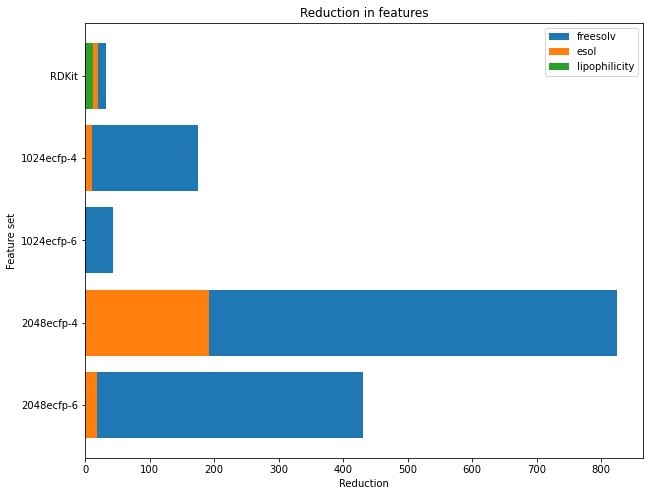

In [26]:
feature_sets_keys = ['RDKit', '1024ecfp-4', '1024ecfp-6', '2048ecfp-4', '2048ecfp-6'][::-1]
positions = range(len(feature_sets_keys))

plt.figure(figsize=(10, 8))
plt.tight_layout()

width = 0.8 # the width of the bars

f = plt.barh(positions, freesolv_reductions['Reduction'][::-1], width)
e = plt.barh(positions, esol_reductions['Reduction'][::-1], width)
l = plt.barh(positions, lipophilicity_reductions['Reduction'][::-1], width)

plt.yticks(positions, feature_sets_keys)
plt.ylabel('Feature set')
plt.xlabel('Reduction')
plt.title('Reduction in features')

plt.legend((f[0], e[0], l[0]), ('freesolv', 'esol', 'lipophilicity'))

# TODO: fix y-labels to fit the saved image
plt.savefig('../figures/comparison_of_zero_var_feature_reduction_for_all_datasets.png')
plt.show()

# Check RDKit descriptors for highly correlated features with the targets

## logP columns (a lead from Garrett)

In [27]:
import re

suspicious_cols = []
for name in rdkit_features.columns:
    m = re.match('(.)*(logP|LogP)(.)*', name)
    if m is not None:
        suspicious_cols.append(m[0])

## Iteration through all and checking correlations

In [28]:
threshold = 0.75
cols_to_remove = [] # column names with correlation > threshold
col_name_1 = 'pearson_r'
col_name_2 = 'abs(pearson_r)'
all_correlations = {
    col_name_1: {},
    col_name_2: {}
}

for name in rdkit_features.columns.difference(cols_with_nas):
    all_correlations[col_name_1][name] = pearsonr(rdkit_features[name], labels)[0]
    all_correlations[col_name_2][name] = np.abs(pearsonr(rdkit_features[name], labels)[0])
    if np.abs(all_correlations[col_name_2][name]) > threshold:
        cols_to_remove.append(name)

print(len(all_correlations[col_name_2]))
cols_to_remove

196


[]

In [29]:
all_correlations_df = pd.DataFrame(all_correlations).sort_values(by=col_name_2, ascending=False)

display(all_correlations_df[:10])

display(all_correlations_df[-10:])

pearson_r  abs(pearson_r)
MolLogP            0.415450        0.415450
fr_COO            -0.353581        0.353581
fr_COO2           -0.353581        0.353581
BalabanJ          -0.301965        0.301965
NumAromaticRings   0.297561        0.297561
fr_Al_COO         -0.282441        0.282441
RingCount          0.280276        0.280276
FpDensityMorgan1  -0.274716        0.274716
SlogP_VSA6         0.236984        0.236984
SMR_VSA7           0.226008        0.226008

pearson_r  abs(pearson_r)
SlogP_VSA9                    NaN             NaN
fr_azide                      NaN             NaN
fr_diazo                      NaN             NaN
fr_isocyan                    NaN             NaN
fr_isothiocyan                NaN             NaN
fr_nitro_arom_nonortho        NaN             NaN
fr_nitroso                    NaN             NaN
fr_prisulfonamd               NaN             NaN
fr_thiocyan                   NaN             NaN
fr_unbrch_alkane              NaN             NaN

How many NaNs did we get?

In [30]:
all_correlations_df[col_name_1].isna().sum()

12

Why do we get NaNs?

In [31]:
all_correlations_df.iloc[-1,:]

pearson_r        NaN
abs(pearson_r)   NaN
Name: fr_unbrch_alkane, dtype: float64

In [32]:
all_correlations_df.iloc[-1,:].name

'fr_unbrch_alkane'

In [33]:
rdkit_features[all_correlations_df.iloc[-1,:].name]

CHEMBL596271     0.0
CHEMBL1951080    0.0
CHEMBL1771       0.0
CHEMBL234951     0.0
CHEMBL565079     0.0
                ... 
CHEMBL496929     0.0
CHEMBL199147     0.0
CHEMBL15932      0.0
CHEMBL558748     0.0
CHEMBL237889     0.0
Name: fr_unbrch_alkane, Length: 4200, dtype: float64

In [34]:
rdkit_features[all_correlations_df.iloc[-1,:].name].std()

0.0

**Important:** we were getting NaNs for correlations for features with zero variance.

Let's check:

**Zero-variance features:**

In [35]:
zero_var_features = rdkit_features.columns[rdkit_features.std(axis=0) == 0]
zero_var_features

Index(['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_azide', 'fr_diazo',
       'fr_isocyan', 'fr_isothiocyan', 'fr_nitro_arom_nonortho', 'fr_nitroso',
       'fr_prisulfonamd', 'fr_thiocyan', 'fr_unbrch_alkane'],
      dtype='object')

**Features with NaNs:**

In [36]:
nan_corr_features = all_correlations_df.index[all_correlations_df[col_name_1].isna()]
nan_corr_features

Index(['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_azide', 'fr_diazo',
       'fr_isocyan', 'fr_isothiocyan', 'fr_nitro_arom_nonortho', 'fr_nitroso',
       'fr_prisulfonamd', 'fr_thiocyan', 'fr_unbrch_alkane'],
      dtype='object')

**Check if the same:**

In [37]:
(zero_var_features == nan_corr_features).all()

True